# Visualising average digit spikes and their differences 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [2]:
params = {} 
params["dataset_directory"] = "/raw-spiking-heidleberg-digits-80input/"
params["verbose"] = False

# load dataset
x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)

training_details = pd.read_csv(os.getcwd() + params.get("dataset_directory") + "training_details.csv")
testing_details = pd.read_csv(os.getcwd() + params.get("dataset_directory") + "testing_details.csv")

list_of_speaker = np.array(list(training_details.loc[:, "Speaker"]))

In [3]:
across_digits = np.load("difference_across_digits.npy")

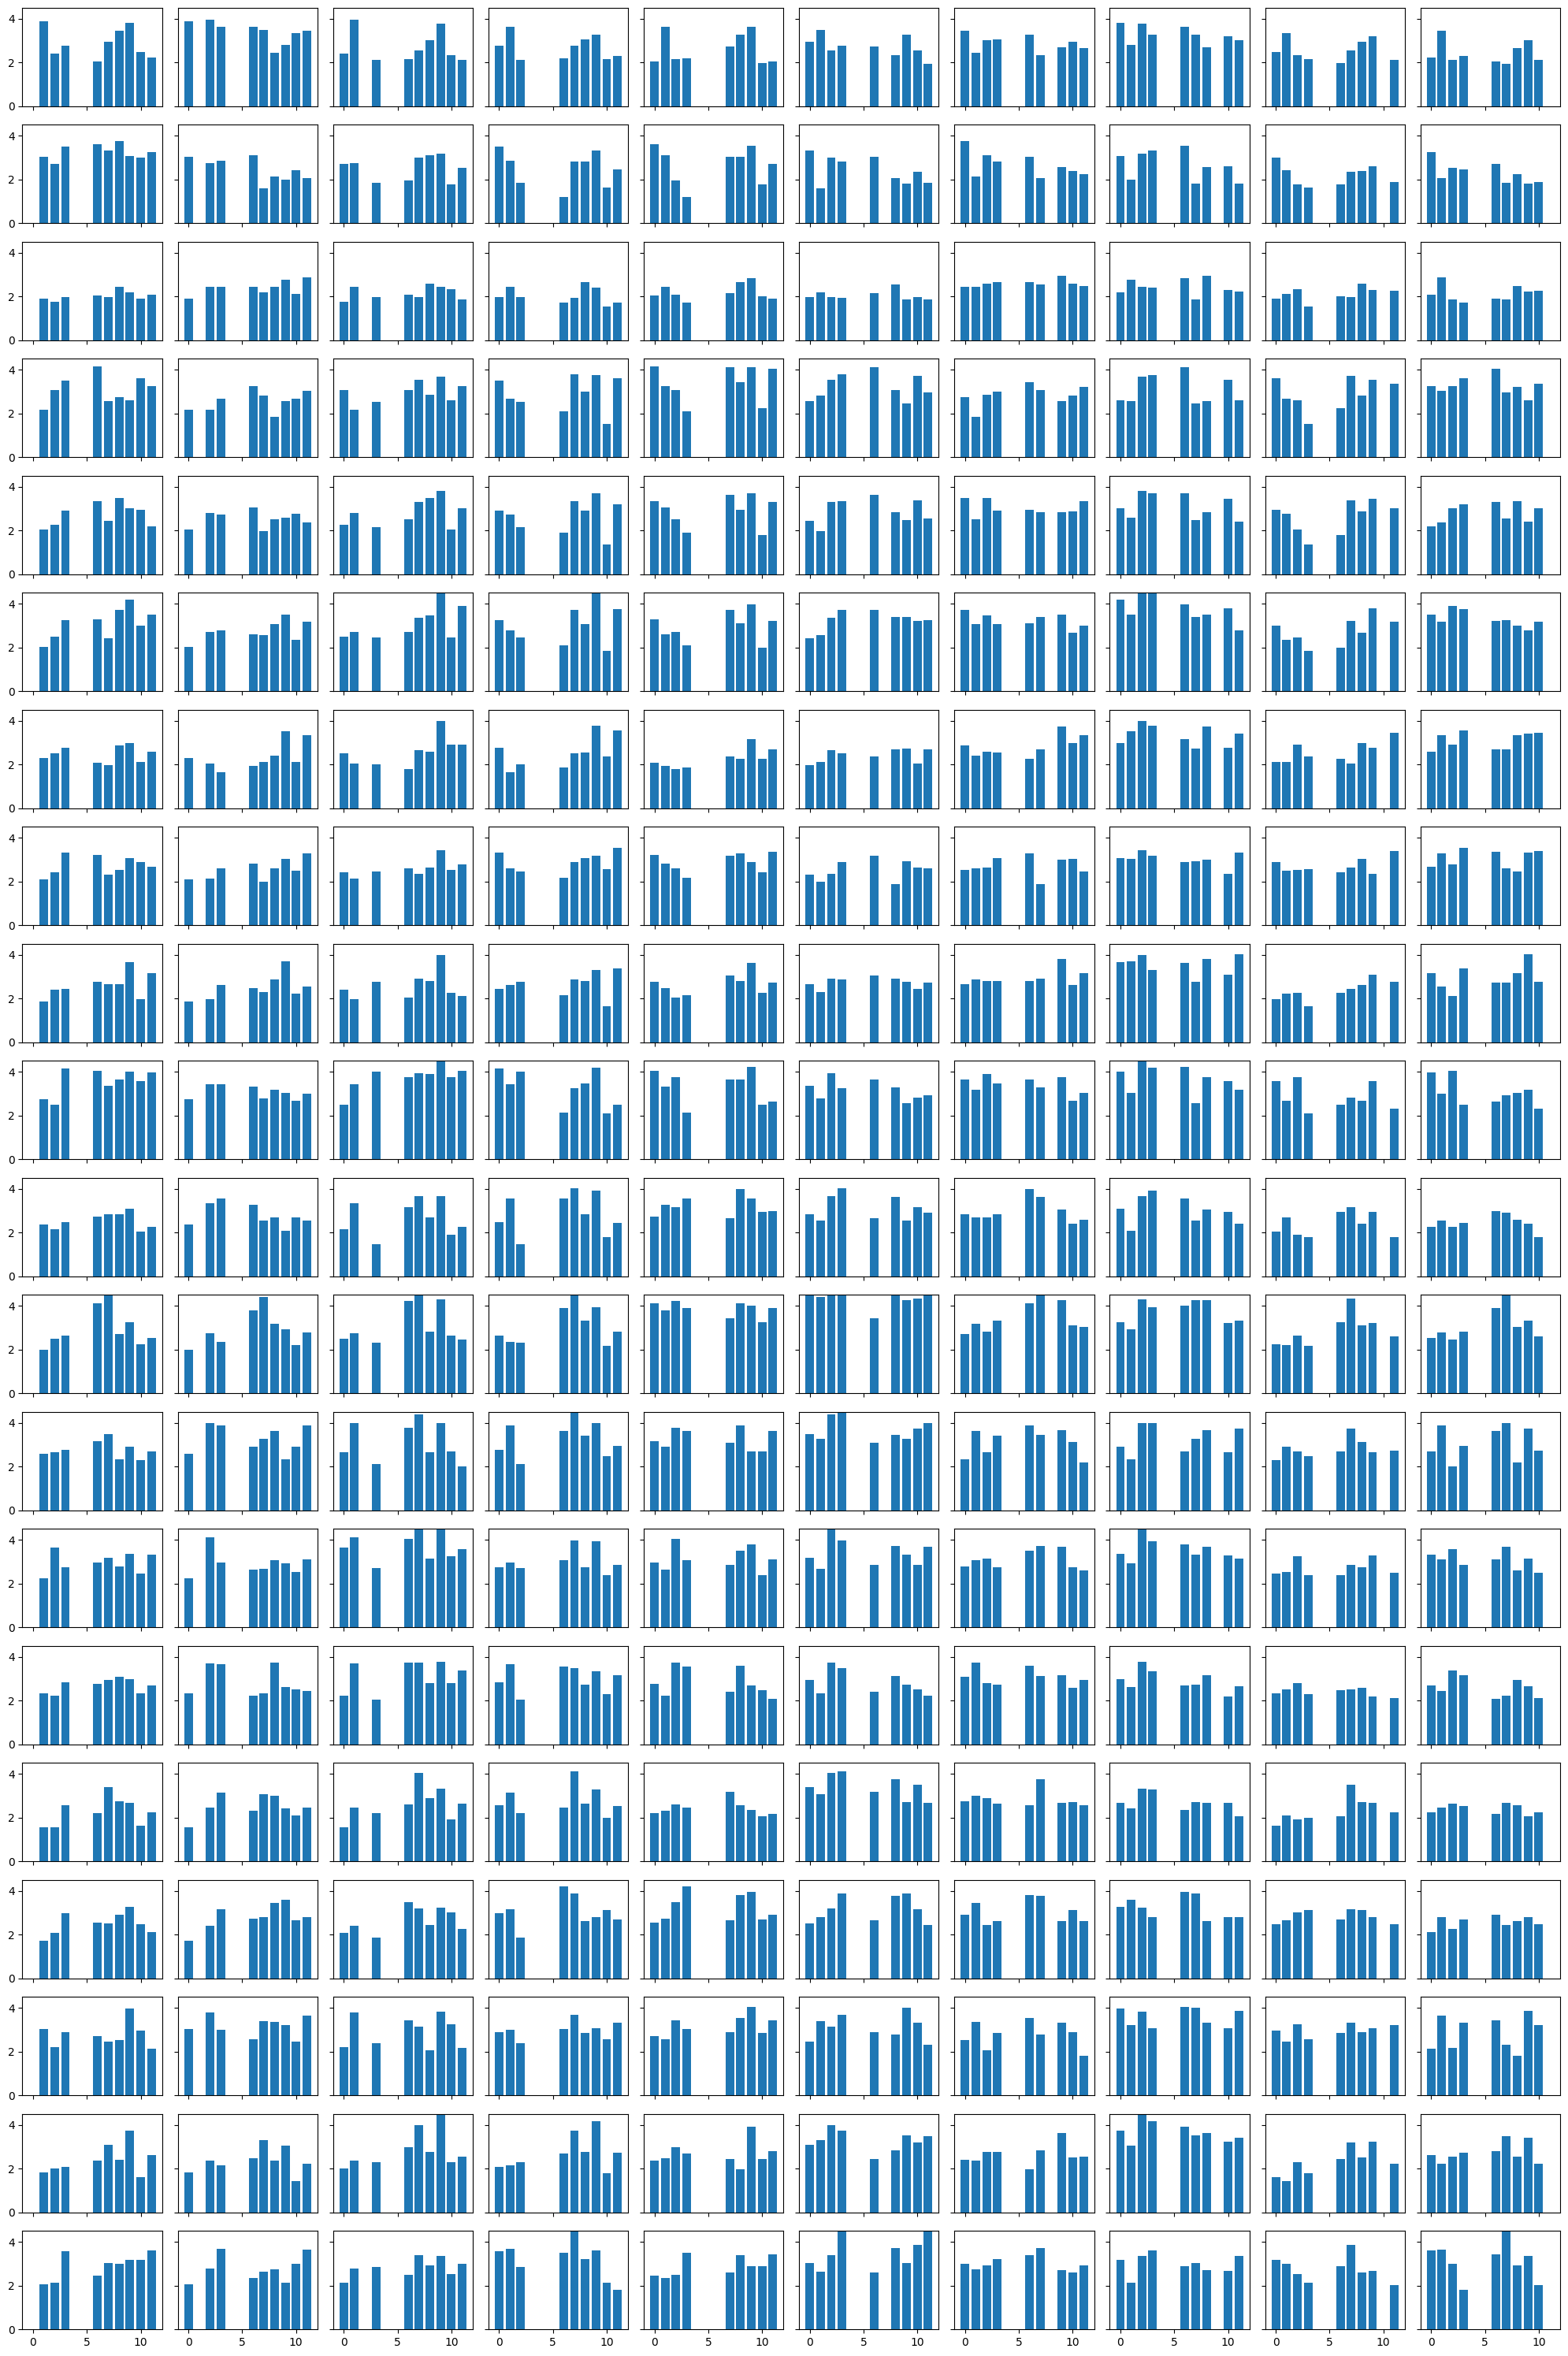

In [4]:
fig, axes = plt.subplots(nrows = 20, ncols = 10, figsize = (20, 30), dpi = 100, sharey = True, sharex = True)

count = 0
for digits in range(20):
    for speakers in range(10):
        ax = axes[digits, speakers]  # Get the correct subplot
        
        ax.bar(across_digits[digits][speakers][0], across_digits[digits][speakers][1])
        ax.set_ylim(0, 4.5)
        
plt.tight_layout()
plt.show()


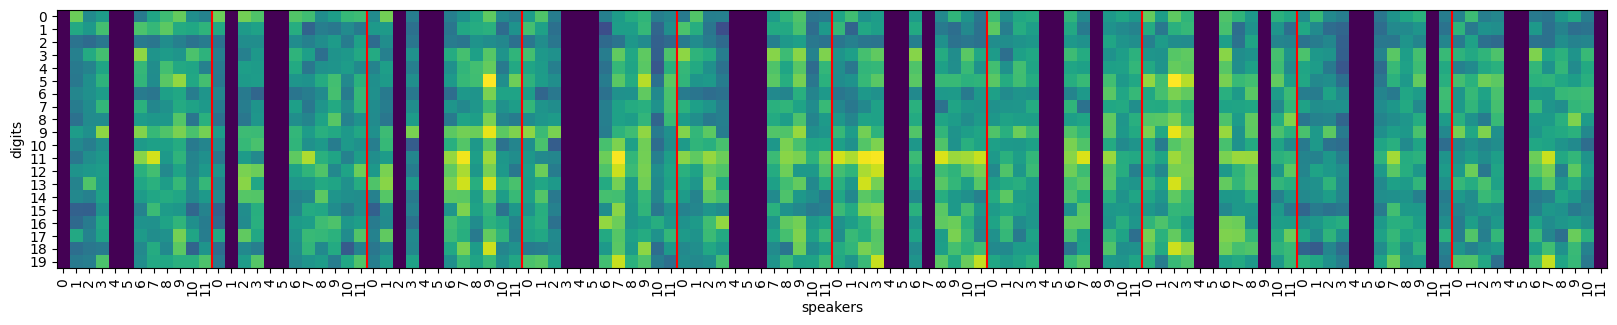

In [5]:
plt.figure(figsize=(20, 20), dpi=100)

heatmap = np.zeros((20, 10 * 12))

for d in range(20):
    for s in range(10):
        for i in range(9):
            heatmap[d, ((s * 12) + np.array(across_digits[d][s][0][i], dtype = "int8"))] = across_digits[d][s][1][i]
            #print(s, across_digits[d][s][0][i], ((s * 12) + np.array(across_digits[d][s][0][i], dtype = "int8")))
        
plt.imshow(heatmap)
plt.ylabel("digits")
plt.xlabel("speakers")
plt.yticks(list(range(20)))
plt.xticks(range(120), np.tile(np.array(list(range(12))), 10), rotation = 90)

plt.vlines([(12 * _) + 11.5 for _ in range(9)], -0.5, 19.5, colors = ("r"),
         linestyles = ("solid"))
 
 
 
plt.show()

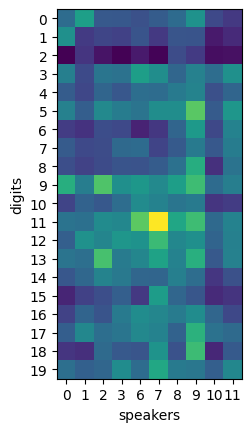

In [6]:
average_heatmap = np.zeros((20, 10))

for d in range(20):
    for s in range(10):
        average_heatmap[d, s] = sum(across_digits[d][s][1]) / len(across_digits[d][s][1])
        
plt.imshow(average_heatmap)
plt.ylabel("digits")
plt.xlabel("speakers")
plt.yticks(list(range(20)))
plt.xticks(range(10), np.unique(list_of_speaker))
plt.show()